In [88]:
pip install mne

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_autism = pd.read_csv('/content/drive/MyDrive/EEG data/merged-autism.csv')
df_autism

,# Fp1,F3,F7,T3,T5,O1,C4,Status
0,-0.000006,-0.000001,-0.000008,0.000008,3.713898e-06,-0.000002,0.000005,0.0
1,-0.000018,-0.000005,0.000001,0.000011,9.854539e-06,0.000008,-0.000006,0.0
2,-0.000022,-0.000009,0.000021,0.000001,8.464205e-06,0.000012,-0.000011,0.0
3,-0.000019,-0.000005,0.000022,-0.000003,1.801335e-07,0.000011,-0.000006,0.0
4,-0.000020,-0.000003,0.000011,0.000008,2.207704e-06,0.000005,-0.000003,0.0
...,...,...,...,...,...,...,...,...
1341435,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019,0.0
1341436,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019,0.0
1341437,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019,0.0
1341438,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019,0.0


In [91]:
df_autism.describe()

,# Fp1,F3,F7,T3,T5,O1,C4,Status
count,1.341440e+06,1.341440e+06,1.341440e+06,1.341440e+06,1.341440e+06,1.341440e+06,1.341440e+06,1.341440e+06
mean,-1.155016e-07,-4.839634e-08,-2.646677e-08,-3.344226e-08,-1.195368e-08,-3.088257e-08,-4.920660e-08,2.401747e-02
std,2.098830e-04,1.104450e-04,1.418331e-04,8.954294e-05,8.650672e-05,1.169733e-04,9.632207e-05,3.528467e-01
min,-3.539090e-03,-2.162230e-03,-2.164480e-03,-2.140920e-03,-1.751930e-03,-1.830580e-03,-2.018920e-03,0.000000e+00
25%,-1.559127e-05,-9.612825e-06,-1.501292e-05,-1.001853e-05,-1.123219e-05,-1.659423e-05,-1.362498e-05,0.000000e+00
50%,-6.844579e-07,1.613260e-07,-1.498059e-07,2.613568e-07,4.697864e-07,2.055564e-07,5.042661e-07,0.000000e+00
75%,1.461463e-05,9.795846e-06,1.464482e-05,1.034355e-05,1.188211e-05,1.706115e-05,1.469576e-05,0.000000e+00
max,2.888000e-03,2.413120e-03,2.324250e-03,2.177620e-03,2.044550e-03,1.827140e-03,2.060200e-03,8.000000e+00


In [92]:
df_autism.drop('Status', inplace=True, axis=1)
df_autism

,# Fp1,F3,F7,T3,T5,O1,C4
0,-0.000006,-0.000001,-0.000008,0.000008,3.713898e-06,-0.000002,0.000005
1,-0.000018,-0.000005,0.000001,0.000011,9.854539e-06,0.000008,-0.000006
2,-0.000022,-0.000009,0.000021,0.000001,8.464205e-06,0.000012,-0.000011
3,-0.000019,-0.000005,0.000022,-0.000003,1.801335e-07,0.000011,-0.000006
4,-0.000020,-0.000003,0.000011,0.000008,2.207704e-06,0.000005,-0.000003
...,...,...,...,...,...,...,...
1341435,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019
1341436,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019
1341437,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019
1341438,-0.003539,-0.002162,-0.002164,-0.002141,-1.751930e-03,-0.001831,-0.002019


In [93]:
import pywt

coeffs = pywt.wavedec(df_autism, 'db4', level=6)
A6, D6, D5, D4, D3, D2, D1 = coeffs
print (D6)

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


[[ 4.24675748e-07  1.07219071e-06 -5.69542826e-06 ... -2.92676701e-07
   5.52687125e-06 -2.34519217e-06]
 [ 6.66118213e-07  2.15476995e-06 -1.43298593e-06 ...  2.96313621e-07
   6.81137844e-07 -2.38344286e-06]
 [ 4.28713250e-07  1.50973116e-06  5.07932143e-07 ...  3.87228023e-07
  -1.09256819e-06 -1.30768289e-06]
 ...
 [ 4.15627005e-05  9.28153041e-05 -8.01412573e-04 ... -4.79617541e-05
   7.99988580e-04 -2.73713822e-04]
 [ 4.15627005e-05  9.28153041e-05 -8.01412573e-04 ... -4.79617541e-05
   7.99988580e-04 -2.73713822e-04]
 [ 4.15627005e-05  9.28153041e-05 -8.01412573e-04 ... -4.79617541e-05
   7.99988580e-04 -2.73713822e-04]]


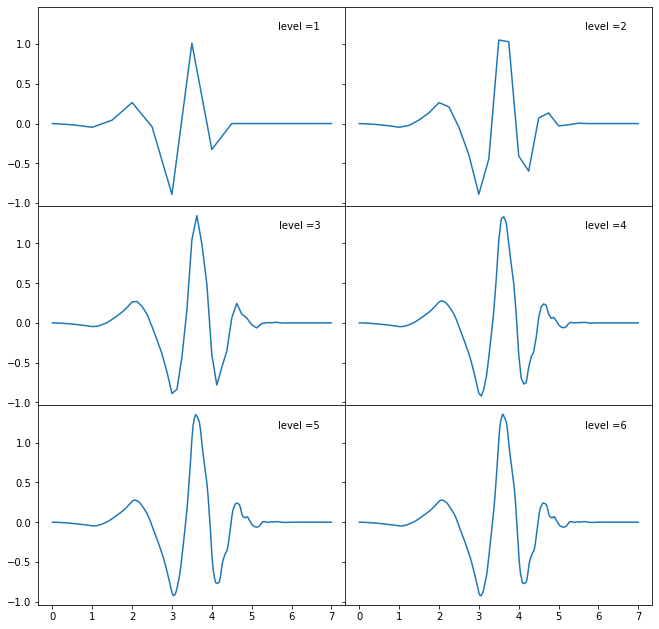

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
from pywt import Wavelet

def plot_wavelet(wavelet):
  fig, axs = plt.subplots(3,2, figsize= (11,11), squeeze= True, sharex=True, sharey=True)
  axs = axs.flatten()
  for i, level in enumerate([1,2,3,4,5,6]):
    try:
      [psi, x] = wavelet.wavefun(level=level)
    except:
      [phi, psi, x] = wavelet.wavefun(level=level)
    axs[i].plot(x, psi)
    axs[i].text(0.85, 0.9, "level ="+str(level), ha='center',va='center', transform= axs[i].transAxes)

  plt.subplots_adjust(wspace=0,hspace=0)
  plt.show()
plot_wavelet(Wavelet('db4'))

In [95]:
print(coeffs)

[array([[-4.93191761e-06, -5.83280472e-06, -5.23669148e-06, ...,
        -1.02320822e-05,  1.08882178e-05,  1.93262005e-05],
       [-1.78237887e-06, -2.16515224e-06, -1.21277165e-06, ...,
        -3.62860360e-06,  3.61723643e-06,  6.50757018e-06],
       [-2.06989229e-07, -5.09277164e-07,  5.82576559e-07, ...,
        -4.39870523e-07,  1.50153929e-07,  3.21515809e-07],
       ...,
       [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
        -1.92797645e-02, -1.62847607e-02, -1.50940952e-02],
       [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
        -1.92797645e-02, -1.62847607e-02, -1.50940952e-02],
       [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
        -1.92797645e-02, -1.62847607e-02, -1.50940952e-02]]), array([[ 4.24675748e-07,  1.07219071e-06, -5.69542826e-06, ...,
        -2.92676701e-07,  5.52687125e-06, -2.34519217e-06],
       [ 6.66118213e-07,  2.15476995e-06, -1.43298593e-06, ...,
         2.96313621e-07,  6.81137844e-07, -2.38344286

In [96]:
my_array = np.array(coeffs)
my_array

array([[[-4.93191761e-06, -5.83280472e-06, -5.23669148e-06, ...,
         -1.02320822e-05,  1.08882178e-05,  1.93262005e-05],
        [-1.78237887e-06, -2.16515224e-06, -1.21277165e-06, ...,
         -3.62860360e-06,  3.61723643e-06,  6.50757018e-06],
        [-2.06989229e-07, -5.09277164e-07,  5.82576559e-07, ...,
         -4.39870523e-07,  1.50153929e-07,  3.21515809e-07],
        ...,
        [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
         -1.92797645e-02, -1.62847607e-02, -1.50940952e-02],
        [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
         -1.92797645e-02, -1.62847607e-02, -1.50940952e-02],
        [-1.85229310e-02, -1.86697891e-02, -1.85645564e-02, ...,
         -1.92797645e-02, -1.62847607e-02, -1.50940952e-02]],

       [[ 4.24675748e-07,  1.07219071e-06, -5.69542826e-06, ...,
         -2.92676701e-07,  5.52687125e-06, -2.34519217e-06],
        [ 6.66118213e-07,  2.15476995e-06, -1.43298593e-06, ...,
          2.96313621e-07,  6.81137844e

In [97]:
my_array.shape

(7, 1341440, 7)

In [98]:
df_autism = pd.DataFrame(my_array.T.reshape(-1, 49))
df_autism

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,-0.000005,4.246757e-07,-5.159204e-07,-5.791824e-07,4.521931e-06,6.688361e-08,-1.494237e-06,-0.000002,6.661182e-07,-1.702288e-06,-6.514280e-07,1.080000e-05,-0.000005,1.286995e-08,-2.069892e-07,4.287133e-07,-1.778254e-06,3.911179e-07,0.000009,-9.900504e-06,0.000004,-0.000003,1.994563e-07,-1.050623e-06,1.084434e-06,0.000005,-0.000010,3.734184e-06,-0.000002,3.891010e-07,-1.426964e-06,3.744014e-07,7.583459e-06,-0.000009,0.000001,0.000005,-1.194408e-07,-8.674295e-07,9.432088e-07,2.514711e-06,-0.000008,1.136320e-06,0.000017,-6.682937e-07,-3.277008e-07,9.254102e-07,-2.167412e-06,-0.000006,4.005958e-07
1,0.000022,-6.271435e-07,-5.511077e-07,2.105381e-07,-4.006915e-07,-3.564388e-06,-5.219611e-07,0.000005,-3.148156e-07,8.283687e-08,5.565957e-07,-2.183215e-06,-0.000002,-1.542921e-06,-4.380091e-06,-1.035041e-07,2.949514e-07,8.677828e-07,-0.000002,-2.456700e-06,0.000002,-0.000009,-5.257601e-09,4.742029e-07,9.553979e-07,-0.000003,-0.000002,3.827586e-07,-0.000014,2.906904e-07,7.868948e-07,-2.423835e-07,-2.163142e-06,0.000004,-0.000005,-0.000014,4.697349e-07,5.712649e-07,-7.374314e-07,-2.479546e-08,0.000006,-3.571096e-06,-0.000015,2.084930e-07,1.109290e-06,-8.084405e-09,-4.085325e-06,0.000005,-2.181180e-06
2,-0.000022,3.258446e-07,1.546305e-06,-1.233186e-08,-5.495423e-06,6.935285e-06,-9.625578e-07,-0.000016,2.515931e-07,8.957982e-07,1.503302e-07,-3.047008e-06,0.000003,7.156832e-07,6.269901e-06,-4.778272e-07,4.488172e-07,6.992568e-07,-0.000005,-8.314850e-07,0.000003,0.000009,-6.801580e-07,2.694477e-07,1.509155e-06,-0.000005,-0.000005,4.865859e-06,0.000004,-1.870925e-07,-4.948510e-07,9.246402e-07,6.425415e-07,-0.000007,0.000003,-0.000023,5.105900e-07,3.377820e-07,8.693299e-07,-1.224844e-07,-0.000003,1.331251e-07,-0.000028,3.429297e-07,6.459785e-07,2.181563e-06,-3.301753e-06,-0.000008,1.045346e-06
3,-0.000015,3.619478e-08,-7.048430e-08,2.468452e-06,-1.615500e-06,-1.201915e-05,2.842852e-06,-0.000019,2.762995e-07,-3.359176e-07,2.339071e-06,6.743206e-07,-0.000013,3.077351e-06,-9.995765e-06,3.681245e-07,-1.178866e-06,1.535326e-06,0.000005,-1.275705e-05,0.000002,-0.000014,5.080284e-07,-9.762338e-07,1.287368e-06,0.000005,-0.000011,8.068116e-07,-0.000008,5.654028e-07,-1.512574e-06,7.233503e-07,8.466850e-06,-0.000010,0.000002,0.000014,-6.408727e-08,-1.685399e-06,2.548413e-07,7.049923e-06,-0.000008,4.369350e-06,0.000038,-1.132190e-06,-1.069500e-06,6.778468e-07,-4.883514e-07,-0.000007,4.445599e-06
4,0.000049,-1.601484e-06,-6.532615e-07,6.615458e-07,-4.266180e-06,-4.982022e-06,4.043569e-06,0.000039,-1.554325e-06,3.001358e-07,7.392075e-07,-8.346087e-06,-0.000001,3.088091e-06,3.225613e-05,-1.320972e-06,6.723839e-07,2.246477e-07,-0.000009,2.787547e-06,0.000002,0.000031,-1.530720e-06,1.542442e-06,2.898018e-07,-0.000013,0.000007,1.640646e-06,0.000037,-2.039209e-06,1.998073e-06,1.122299e-06,-1.815038e-05,0.000005,0.000004,0.000026,-2.089276e-06,2.869259e-06,1.984554e-06,-2.298706e-05,0.000005,2.411465e-06,0.000014,-2.115603e-06,4.079873e-06,2.465347e-06,-2.891642e-05,0.000008,-4.929569e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341435,0.000083,-6.172904e-06,-4.950774e-06,-2.505033e-06,-1.797750e-06,-8.447437e-06,-3.442155e-06,-0.000012,1.635852e-06,-1.162992e-06,-5.642326e-07,1.238847e-05,-0.000004,-5.372413e-06,2.858913e-05,-4.620425e-07,-4.979759e-06,-4.492200e-06,0.000024,-1.589193e-06,-0.000004,0.000061,-3.113180e-06,-6.729662e-06,-4.401069e-06,0.000020,-0.000008,1.881118e-06,-0.000011,1.811998e-06,-1.968273e-06,-8.213951e-07,1.698001e-05,-0.000005,0.000004,-0.000018,1.969724e-06,-1.027148e-06,2.210146e-07,1.271588e-05,-0.000006,5.970554e-06,0.000005,-1.659780e-07,-1.227411e-06,4.143296e-07,4.556507e-06,-0.000007,5.226722e-06
1341436,-0.015094,-2.737138e-04,1.215

In [99]:
df_autism_mean = df_autism.groupby(np.arange(len(df_autism))//1000).mean()
df_autism_mean.to_csv('autism_mean.csv')

In [100]:
df_autism_mean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,4.845990e-08,2.689645e-09,-4.746735e-09,-1.353173e-08,4.202348e-08,3.524332e-08,-4.876690e-08,1.994846e-07,-4.240620e-10,-1.563059e-08,-8.029482e-09,7.208062e-08,-4.219260e-08,-3.260471e-08,5.177230e-07,-7.099787e-09,-3.657702e-08,1.449962e-09,1.315642e-07,-1.650692e-07,9.229964e-08,2.350283e-07,-6.563290e-09,-6.667627e-09,4.679689e-09,9.776704e-10,-3.274064e-08,1.365039e-07,6.081454e-08,-6.580253e-09,1.135687e-08,8.567575e-09,-8.219184e-08,2.599876e-08,1.084743e-07,-2.053189e-07,-9.159383e-09,3.702832e-08,3.116376e-08,-2.283880e-07,2.533056e-08,-9.545209e-09,-2.035521e-07,1.075321e-08,-2.875901e-10,-1.721160e-08,5.893773e-08,6.943580e-08,-8.313093e-08
1,7.669445e-08,-7.086060e-09,1.875982e-08,-2.796123e-09,-1.124898e-07,8.562506e-08,-1.341198e-07,-8.178643e-09,-8.292230e-10,4.350194e-09,6.027838e-10,-2.607235e-08,1.360009e-09,-1.169174e-07,9.225196e-08,-9.362802e-09,1.138512e-08,1.706467e-08,-1.041484e-07,-2.735182e-08,-2.028408e-08,1.288014e-07,-1.008771e-08,1.740328e-09,2.910761e-08,-7.143613e-08,-1.135553e-07,1.056797e-07,-4.029578e-07,1.019916e-08,1.152826e-08,3.358386e-09,-1.092498e-08,3.478749e-08,1.167383e-08,-1.772057e-08,5.539765e-09,-1.071470e-08,-8.050993e-09,7.787336e-08,-9.442331e-09,3.675242e-08,3.448424e-07,-1.720339e-08,1.507845e-08,8.503750e-09,-1.454420e-07,3.280848e-08,-2.343906e-08
2,3.412979e-08,-1.967481e-08,3.118275e-08,4.927486e-08,-2.771794e-07,-1.808845e-07,-6.532847e-07,-4.591698e-07,2.373565e-08,1.906939e-09,-3.899933e-08,1.439837e-07,3.156842e-07,8.957228e-07,-2.875143e-08,-1.195756e-08,1.806081e-08,3.931005e-08,-1.784561e-07,-1.977401e-07,-6.511404e-07,5.036682e-07,-2.760148e-08,2.977855e-08,1.340716e-08,-2.524121e-07,1.196312e-07,2.309909e-07,-1.502783e-07,2.657062e-08,-6.801162e-08,-9.714719e-09,4.168853e-07,-2.911094e-07,-8.008706e-08,8.082214e-07,-4.451239e-08,3.875604e-08,3.263846e-08,-3.910414e-07,-5.057969e-09,-3.358678e-07,-7.410598e-07,5.173618e-08,-3.298700e-08,-8.304571e-08,4.458485e-07,3.156577e-07,6.037229e-07
3,-1.660589e-07,1.359147e-08,-7.437346e-09,-2.661837e-08,1.166917e-07,1.224174e-07,2.530689e-07,-8.975588e-07,5.383769e-08,-3.609905e-08,-6.522815e-08,4.373234e-07,1.244883e-07,-2.370846e-08,-1.784384e-07,1.061316e-08,-1.183140e-08,-5.342860e-09,9.518668e-08,-7.109761e-08,-2.531107e-07,-1.254366e-07,3.963380e-09,1.855168e-09,3.537599e-11,5.623272e-09,-1.422569e-08,-1.552641e-07,-6.425749e-07,4.594255e-08,-4.581644e-08,-5.516062e-08,4.432591e-07,5.162599e-08,1.284027e-07,-3.832182e-07,3.686541e-08,-4.149845e-08,-5.983741e-08,3.929686e-07,1.224895e-07,3.002073e-07,-3.251260e-08,5.120977e-09,-9.076010e-09,-4.215203e-09,7.198625e-08,1.683066e-08,3.190844e-07
4,2.141650e-07,-1.549363e-08,2.160521e-08,1.228589e-08,-1.742791e-07,2.399387e-08,-1.560571e-07,-1.115588e-07,-4.189381e-09,1.123238e-08,2.559383e-08,-9.303922e-08,-9.064452e-08,-1.678974e-07,-3.444334e-07,2.059752e-08,-1.216928e-08,-2.497353e-08,1.651632e-07,8.662463e-08,1.961788e-07,6.370366e-07,-3.251781e-08,1.764901e-08,3.135240e-08,-2.435670e-07,-7.246743e-08,-6.500504e-08,-4.874819e-08,4.508942e-09,1.512504e-09,-1.515032e-08,2.335690e-08,7.087277e-08,-4.463867e-08,-2.362849e-07,3.138331e-08,-1.921379e-08,-8.866332e-08,2.978402e-07,3.667902e-07,2.874850e-07,7.813807e-08,9.563296e-09,-1.240252e-08,-4.154484e-08,1.339005e-07,1.662706e-07,1.870613e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,-1.784154e-06,1.325725e-07,9.317281e-08,7.194749e-08,8.265595e-08,4.912978e-08,2.467205e-07,-2.186018e-06,1.549143e-07,1.207615e-07,1.178435e-07,1.876651e-08,-3.997095e-08,3.184159e-07,-2.307152e-06,1.551777e-07,1.581332e-07,1.232780e-07,-1.504141e-07,8.468541e-08,1.180357e-07,7.735187e-07,-6.556079e-08,-5.645079e-09,-3.269386e-08,-2.217257

In [101]:
df_autism_std = df_autism.groupby(np.arange(len(df_autism))//1000).std()
df_autism_std.to_csv('autism_std.csv')

In [102]:
df_autism_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007
1,0.000032,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007
2,0.000061,0.000004,0.000004,0.000005,0.000041,0.000014,0.000036,0.000073,0.000005,0.000005,0.000005,0.000046,0.000012,0.000028,0.000061,0.000004,0.000005,0.000005,0.000041,0.000017,0.000035,0.000071,0.000005,0.000005,0.000005,0.000046,0.000013,0.000030,0.000062,0.000004,0.000004,0.000005,0.000040,0.000015,0.000032,0.000066,0.000004,0.000005,0.000005,0.000043,0.000013,0.000033,0.000070,0.000005,0.000005,0.000005,0.000045,0.000015,0.000029
3,0.000084,0.000005,0.000006,0.000005,0.000051,0.000014,0.000029,0.000074,0.000005,0.000005,0.000005,0.000046,0.000014,0.000030,0.000076,0.000005,0.000005,0.000005,0.000047,0.000015,0.000034,0.000076,0.000005,0.000005,0.000005,0.000048,0.000015,0.000033,0.000073,0.000005,0.000005,0.000005,0.000046,0.000014,0.000029,0.000078,0.000005,0.000005,0.000005,0.000048,0.000014,0.000028,0.000083,0.000005,0.000005,0.000006,0.000050,0.000014,0.000028
4,0.000074,0.000005,0.000006,0.000006,0.000050,0.000016,0.000034,0.000073,0.000005,0.000006,0.000006,0.000050,0.000018,0.000037,0.000071,0.000005,0.000005,0.000005,0.000048,0.000016,0.000033,0.000076,0.000005,0.000006,0.000006,0.000050,0.000016,0.000034,0.000071,0.000005,0.000006,0.000005,0.000048,0.000016,0.000033,0.000078,0.000005,0.000006,0.000006,0.000053,0.000018,0.000040,0.000086,0.000006,0.000006,0.000006,0.000054,0.000016,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,0.000213,0.000016,0.000011,0.000009,0.000033,0.000017,0.000012,0.000221,0.000017,0.000011,0.000010,0.000033,0.000017,0.000012,0.000244,0.000018,0.000013,0.000011,0.000034,0.000017,0.000012,0.000238,0.000018,0.000012,0.000011,0.000033,0.000017,0.000012,0.000247,0.000018,0.000013,0.000011,0.000034,0.000017,0.000012,0.000254,0.000019,0.000013,0.000012,0.000034,0.000017,0.000012,0.000235,0.000018,0.000012,0.000010,0.000034,0.000017,0.000012
1338,0.000274,0.000020,0.000015,0.000013,0.000037,0.000022,0.000017,0.000283,0.000021,0.000015,0.000013,0.000037,0.000022,0.000016,0.000288,0.000021,0.000015,0.000014,0.000036,0.000022,0.000016,0.000269,0.000020,0.000014,0.000013,0.000037,0.000022,0.000017,0.000279,0.000021,0.000015,0.000013,0.000037,0.000022,0.000017,0.000253,0.000019,0.000014,0.000012,0.000036,0.000022,0.000016,0.000263,0.000019,0.000014,0.000013,0.000037,0.000022,0.000016
1339,0.000223,0.000017,0.000012,0.000010,0.000033,0.000016,0.000011,0.000224,0.000017,0.000012,0.000010,0.000033,0.000017,0.000011,0.000243,0.000018,0.000013,0.000011,0.000034,0.000017,0.000012,0.000261,0.000019,0.000013,0.000012,0.000035,0.000019,0.000013,0.000238,0.000018,0.000013,0.000011,0.000034,0.000016,0.000011,0.000239,0.000018,0.000013,0.000011,0.000034,0.000017,0.000012,0.000238,0.000018,0.000013,0.000011,0.000034,0.000017,0.000011
1340,0.000355,0.000026,0.000019,0.000016,0.000041,0.000020,0.000015,0.000346,0.000026,0.000018,0.000015,0.000

In [103]:
import pandas as pd
import numpy as np
df_normal = pd.read_csv('/content/drive/MyDrive/EEG data/merged-normal.csv')
df_normal

,# Fp1,F3,F7,T3,T5,O1,C4,Status
0,-0.000010,1.534472e-06,2.239065e-06,0.000002,0.000002,0.000003,-1.164659e-06,0.0
1,-0.000004,9.809208e-07,4.049681e-06,0.000002,-0.000002,-0.000001,4.104265e-07,0.0
2,-0.000011,-4.429595e-06,4.640100e-06,0.000002,0.000003,0.000003,1.514869e-06,0.0
3,-0.000023,-4.126035e-06,-1.226087e-07,0.000008,0.000010,0.000010,-6.375390e-07,0.0
4,-0.000013,-4.286743e-06,-2.943497e-06,0.000005,0.000007,0.000008,-7.191171e-07,0.0
...,...,...,...,...,...,...,...,...
383227,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04,0.0
383228,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04,0.0
383229,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04,0.0
383230,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04,0.0


In [104]:
#df_normal = df_normal[0:383230]
#df_normal

In [105]:
df_normal.describe()

,# Fp1,F3,F7,T3,T5,O1,C4,Status
count,3.832320e+05,3.832320e+05,3.832320e+05,3.832320e+05,3.832320e+05,3.832320e+05,3.832320e+05,383232.000000
mean,1.709656e-09,-1.841807e-08,-1.593105e-08,-1.306295e-08,-4.921431e-09,-7.295035e-09,-1.867826e-10,0.014383
std,4.631753e-05,1.572135e-05,2.482419e-05,1.658451e-05,1.494874e-05,2.405043e-05,1.597510e-05,0.218670
min,-7.206530e-04,-7.111180e-04,-3.694490e-04,-2.951410e-04,-1.616580e-04,-3.402490e-04,-1.984520e-04,0.000000
25%,-1.060067e-05,-5.947397e-06,-8.690236e-06,-6.097486e-06,-7.095596e-06,-1.096634e-05,-8.010949e-06,0.000000
50%,-4.081817e-07,1.416658e-07,3.497260e-07,2.500870e-07,1.605493e-09,-3.928884e-07,1.154901e-07,0.000000
75%,9.784305e-06,6.284298e-06,9.481531e-06,6.624594e-06,7.164898e-06,1.059118e-05,8.241929e-06,0.000000
max,8.697390e-04,4.591070e-04,4.903970e-04,2.932440e-04,1.715190e-04,7.809990e-04,2.127960e-04,5.000000


In [106]:
df_normal.drop('Status', inplace=True, axis=1)
df_normal

,# Fp1,F3,F7,T3,T5,O1,C4
0,-0.000010,1.534472e-06,2.239065e-06,0.000002,0.000002,0.000003,-1.164659e-06
1,-0.000004,9.809208e-07,4.049681e-06,0.000002,-0.000002,-0.000001,4.104265e-07
2,-0.000011,-4.429595e-06,4.640100e-06,0.000002,0.000003,0.000003,1.514869e-06
3,-0.000023,-4.126035e-06,-1.226087e-07,0.000008,0.000010,0.000010,-6.375390e-07
4,-0.000013,-4.286743e-06,-2.943497e-06,0.000005,0.000007,0.000008,-7.191171e-07
...,...,...,...,...,...,...,...
383227,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04
383228,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04
383229,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04
383230,-0.000721,-7.111180e-04,-3.694490e-04,-0.000295,-0.000162,-0.000340,-1.984520e-04


In [107]:
import pywt

coeffs_normal = pywt.wavedec(df_normal, 'db4', level=6)
A6, D6, D5, D4, D3, D2, D1 = coeffs_normal
print (A6)

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


[[-1.65828682e-06 -2.09066546e-06 -1.57887064e-06 ... -3.52525649e-06
   3.77420319e-06  6.65787919e-06]
 [ 1.10775937e-06  1.23354501e-06  1.31236602e-06 ...  2.27634787e-06
  -2.46991731e-06 -4.38627247e-06]
 [-5.24346931e-06 -6.38083835e-06 -5.47579943e-06 ... -1.10355038e-05
   1.18657489e-05  2.09680419e-05]
 ...
 [-3.52591573e-03 -3.59158297e-03 -3.54920362e-03 ... -3.88723429e-03
  -2.45216328e-03 -1.88027764e-03]
 [-3.52591573e-03 -3.59158297e-03 -3.54920362e-03 ... -3.88723429e-03
  -2.45216328e-03 -1.88027764e-03]
 [-3.52591573e-03 -3.59158297e-03 -3.54920362e-03 ... -3.88723429e-03
  -2.45216328e-03 -1.88027764e-03]]


In [108]:
my_array1 = np.array(coeffs_normal)
my_array1

array([[[-1.65828682e-06, -2.09066546e-06, -1.57887064e-06, ...,
         -3.52525649e-06,  3.77420319e-06,  6.65787919e-06],
        [ 1.10775937e-06,  1.23354501e-06,  1.31236602e-06, ...,
          2.27634787e-06, -2.46991731e-06, -4.38627247e-06],
        [-5.24346931e-06, -6.38083835e-06, -5.47579943e-06, ...,
         -1.10355038e-05,  1.18657489e-05,  2.09680419e-05],
        ...,
        [-3.52591573e-03, -3.59158297e-03, -3.54920362e-03, ...,
         -3.88723429e-03, -2.45216328e-03, -1.88027764e-03],
        [-3.52591573e-03, -3.59158297e-03, -3.54920362e-03, ...,
         -3.88723429e-03, -2.45216328e-03, -1.88027764e-03],
        [-3.52591573e-03, -3.59158297e-03, -3.54920362e-03, ...,
         -3.88723429e-03, -2.45216328e-03, -1.88027764e-03]],

       [[ 1.83425215e-07,  5.22199939e-07, -1.79899160e-06, ...,
         -3.18111705e-08,  1.67903428e-06, -9.09783807e-07],
        [-5.52485077e-08, -8.71656854e-08,  1.40146192e-06, ...,
          1.21726716e-07, -1.42501681e

In [109]:
df_normal = pd.DataFrame(my_array1.T.reshape(-1,49))
df_normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,-1.658287e-06,1.834252e-07,-5.750832e-07,1.703285e-07,3.119287e-06,-3.730490e-06,-8.161995e-07,0.000001,-5.524851e-08,-1.787638e-07,3.438856e-07,2.691709e-07,-2.474515e-06,3.299009e-07,-0.000005,3.790401e-07,-7.487172e-07,4.864604e-08,4.851458e-06,-3.742147e-06,0.000001,-0.000010,8.888799e-07,-1.666234e-06,-4.019963e-07,0.000011,-0.000006,-1.058964e-06,-0.000008,6.556110e-07,-1.036837e-06,-5.399194e-07,0.000008,-2.607034e-06,-6.475466e-07,-0.000011,6.989175e-07,-1.016008e-06,-1.835942e-07,0.000008,-4.052787e-06,8.323297e-07,-1.766565e-05,8.582764e-07,-8.574082e-07,-1.023386e-07,7.381207e-06,-4.093587e-06,-1.615661e-06
1,-2.594758e-05,1.010247e-06,-5.169264e-07,6.145278e-08,6.336104e-06,-3.642637e-06,-3.761990e-06,-0.000021,8.875986e-07,-9.419358e-07,3.546648e-07,7.440893e-06,-7.042006e-06,-3.813453e-06,-0.000008,4.406573e-07,-5.424176e-07,-1.224568e-07,4.224848e-06,-2.698283e-06,-0.000004,-0.000004,2.406645e-07,-3.836183e-07,-3.780818e-09,0.000003,-0.000002,-3.872528e-06,-0.000007,5.129153e-07,-9.435865e-07,-1.290332e-07,0.000006,-4.549513e-06,-4.038086e-06,-0.000008,4.477413e-07,-5.804106e-07,-2.485346e-08,0.000004,-3.289677e-06,-3.963992e-06,-8.888453e-07,-2.021641e-08,8.593857e-08,1.276825e-07,-6.199397e-07,-4.578814e-07,-2.185238e-06
2,5.594869e-06,-1.854608e-07,-7.791582e-08,8.680347e-08,-5.270617e-07,-8.729706e-07,-1.202462e-06,-0.000001,-6.780352e-08,3.429345e-08,5.060072e-07,-8.905274e-07,-2.524517e-06,-1.746660e-06,-0.000011,1.865631e-07,2.864255e-07,4.622103e-07,-8.914172e-07,-1.174757e-06,-0.000002,-0.000015,1.886869e-07,2.805492e-07,1.159449e-06,-0.000001,-0.000004,-1.203547e-06,-0.000013,1.007681e-07,3.884446e-07,1.208122e-06,-0.000002,-4.085960e-06,-9.870647e-07,-0.000006,-1.814767e-07,7.060614e-07,9.498974e-07,-0.000005,-9.125738e-07,1.332888e-06,-1.813890e-06,-5.063574e-07,1.335625e-06,9.863664e-07,-8.749870e-06,2.071205e-06,1.877816e-06
3,-2.190150e-07,-4.870679e-07,1.309369e-06,6.474336e-07,-8.312567e-06,3.287812e-06,6.091788e-08,-0.000004,-3.298433e-07,1.038284e-06,8.501780e-07,-6.638447e-06,1.003282e-06,4.893671e-07,-0.000004,-3.424817e-07,1.479708e-06,3.660739e-07,-8.199558e-06,5.538527e-06,0.000001,0.000004,-6.773136e-07,1.697896e-06,2.552027e-07,-0.000010,0.000007,1.885540e-06,0.000017,-9.935290e-07,1.066940e-06,6.191534e-07,-0.000009,2.585582e-06,1.621940e-06,0.000019,-8.969259e-07,6.381462e-07,2.933670e-07,-0.000007,1.872626e-06,-1.099262e-07,1.858156e-05,-9.183487e-07,7.703096e-07,3.706750e-07,-7.483870e-06,2.457949e-06,2.205815e-06
4,2.431545e-05,-9.597548e-07,3.790195e-07,1.526228e-07,-5.725067e-06,1.739217e-06,2.733203e-06,0.000022,-9.124831e-07,4.898124e-07,2.106425e-07,-6.078951e-06,1.823307e-06,1.481021e-06,0.000017,-9.003690e-07,9.000443e-07,3.610747e-07,-7.950818e-06,3.110198e-06,0.000002,0.000013,-6.923872e-07,8.414486e-07,1.320316e-07,-0.000007,0.000004,7.924765e-07,0.000015,-8.851894e-07,7.874338e-07,7.387413e-07,-0.000008,6.396353e-07,2.012706e-06,0.000017,-8.767022e-07,7.271716e-07,4.901795e-07,-0.000007,1.489829e-06,9.948127e-07,1.357848e-05,-8.888683e-07,1.176225e-06,4.993204e-07,-9.291206e-06,3.381497e-06,-4.396933e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383227,-2.395780e-05,2.302316e-06,-4.265302e-07,6.763024e-07,1.096098e-05,-5.585353e-06,4.588546e-06,-0.000008,1.561119e-06,-1.758167e-06,-1.600435e-06,1.557044e-05,-1.350434e-06,-2.895759e-06,0.000010,1.729548e-07,-3.724507e-06,-6.210452e-07,1.786800e-05,-1.313944e-05,0.000008,-0.000027,3.231009e-06,-2.609524e-06,4.082180e-07,0.000025,-0.000015,3.925544e-06,-0.000035,4.100737e-06,-1.778600e-06,-1.123065e-06,0.000026,-4.695839e-06,-1.790180e-06,-0.000086,7.920381e-06,1.846642e-06,-8.410049e-07,0.000025,8.365088e-06,-7.581811e-06,-7.07327

In [110]:
df_mean = df_normal.groupby(np.arange(len(df_normal))//1000).mean()
df_mean.to_csv('normal_mean.csv')

In [111]:
df_mean = pd.read_csv('normal_mean.csv')
df_mean

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,-6.237121e-07,3.680600e-08,-7.654059e-08,2.889094e-08,4.616848e-07,-5.345920e-07,-1.493470e-07,-6.998732e-07,3.711292e-08,-6.842573e-08,2.873763e-08,4.271582e-07,-4.980669e-07,-1.740190e-07,-7.122634e-07,3.650888e-08,-6.035303e-08,2.260156e-08,3.943897e-07,-4.305385e-07,-1.947632e-07,-4.727630e-07,2.642884e-08,-5.320595e-08,2.253358e-08,3.220085e-07,-3.858813e-07,-1.234886e-07,-2.813603e-07,2.117331e-08,-5.314956e-08,1.616449e-08,3.054541e-07,-3.515603e-07,-1.221630e-07,-3.009695e-07,1.984346e-08,-4.776473e-08,1.866299e-08,2.752664e-07,-3.304910e-07,-8.036835e-08,-4.205705e-07,2.696202e-08,-6.195981e-08,2.331105e-08,3.629594e-07,-4.230659e-07,-7.844569e-08
1,1,3.192788e-07,-9.581006e-09,1.384431e-08,-2.555581e-08,-7.687058e-08,2.061646e-07,1.031276e-07,2.029316e-07,-6.565359e-09,1.381687e-08,-2.103812e-08,-6.963205e-08,1.742409e-07,3.898269e-08,2.112072e-07,-1.095632e-08,2.242853e-08,-1.239875e-08,-1.328644e-07,1.737380e-07,3.324656e-08,1.186981e-07,-8.080087e-09,2.820828e-08,-1.922366e-08,-1.404300e-07,2.338526e-07,4.717887e-08,1.752109e-07,-8.903321e-09,2.378244e-08,-1.862403e-08,-1.250255e-07,2.095481e-07,3.916744e-08,1.224901e-08,1.567471e-09,-2.369624e-09,-6.388338e-09,2.322723e-08,2.464192e-08,4.776153e-08,1.397541e-08,5.146520e-10,1.090245e-08,-2.010385e-08,-2.730790e-08,1.585917e-07,6.887188e-08
2,2,4.832000e-07,-1.580943e-08,6.230256e-09,-1.114246e-08,-7.992984e-08,1.062598e-07,1.235198e-07,7.935455e-07,-4.544678e-08,3.796660e-08,4.106924e-08,-3.843616e-07,3.590803e-08,2.968008e-07,-4.332405e-07,1.927471e-09,8.815811e-08,-6.087150e-08,-3.319035e-07,6.854178e-07,-2.012120e-07,3.733731e-07,-2.125540e-08,5.736480e-08,-3.774795e-08,-3.082324e-07,4.610843e-07,9.468168e-09,4.114966e-07,-3.235232e-08,7.286717e-08,-9.893779e-09,-4.450582e-07,4.122469e-07,5.779773e-08,6.264316e-07,-3.477451e-08,5.242541e-08,-5.432830e-09,-3.680527e-07,3.017682e-07,1.125376e-07,1.045019e-06,-4.597279e-08,3.262419e-08,7.641815e-09,-3.373743e-07,1.575303e-07,1.933238e-07
3,3,2.105627e-07,-1.204706e-08,9.321845e-09,1.193174e-08,-9.903928e-08,-2.573984e-09,-2.061008e-08,2.605717e-07,-4.344606e-09,-1.439473e-08,-2.283722e-09,4.825971e-08,-5.451044e-08,-6.944880e-08,3.858114e-07,-9.732411e-09,-1.194973e-08,2.934016e-10,1.373277e-08,-4.918398e-08,-3.771017e-08,5.316138e-07,-1.719208e-08,-1.338035e-08,1.516754e-08,-2.149882e-08,-1.128155e-07,4.026079e-08,6.419528e-07,-1.901793e-08,-1.800700e-08,1.208014e-08,-6.184884e-09,-1.202690e-07,4.430126e-08,5.984843e-07,-2.332105e-08,2.976584e-10,1.511359e-08,-1.085212e-07,-5.436810e-08,-9.927114e-09,4.137267e-07,-1.999411e-08,1.060954e-08,1.550000e-08,-1.400588e-07,-9.262929e-09,4.255063e-09
4,4,-6.728953e-07,2.824750e-08,-1.449281e-08,-7.253673e-09,1.834758e-07,-5.963923e-08,-3.987697e-08,-1.082522e-06,4.328011e-08,-2.226119e-08,-2.626486e-09,2.724978e-07,-1.437981e-07,-1.787293e-07,-6.677285e-07,1.782904e-08,4.118365e-08,-3.411622e-08,-8.045708e-08,3.458622e-07,2.401168e-08,-3.324229e-07,8.000972e-09,5.887314e-09,8.134430e-09,-1.303488e-09,-1.940158e-08,4.556609e-08,-4.414681e-07,8.393345e-09,1.730449e-08,8.534675e-09,-5.103055e-08,2.857499e-08,6.438593e-09,-2.912893e-07,6.287588e-11,2.736858e-08,1.078791e-08,-1.308754e-07,7.157805e-08,4.108607e-08,-5.782533e-07,1.469381e-08,3.261838e-08,-2.146781e-08,-6.584105e-08,2.453915e-07,1.788537e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,-7.712857e-07,9.651843e-08,-2.185913e-07,1.990516e-07,1.195970e-06,-2.004931e-06,2.205659e-07,-1.048440e-06,9.876198e-08,-3.857278e-08,6.815500e-08,5.247011e-07,-5.513208e-07,6.592627e-08,-1.317346e-06,1.069081e-07,-9.394960e-08,2.353169e-07,6.585823e-07,-1.621405e-06,1.553863e-07,-4.122128e-06,3.651221e-07,4.32450

In [112]:
df_std = df_normal.groupby(np.arange(len(df_normal))//1000).std()
df_std.to_csv('normal_std.csv')

In [113]:
df_std = pd.read_csv('normal_std.csv')
df_std

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,0.000028,0.000002,0.000003,0.000002,0.000021,0.000024,0.000008,0.000028,0.000002,0.000003,0.000002,0.000021,0.000024,0.000007,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000026,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008
1,1,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000004,0.000002,0.000020,0.000023,0.000006,0.000028,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000004,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006
2,2,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000011,0.000040,0.000002,0.000004,0.000002,0.000025,0.000030,0.000011,0.000039,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011,0.000039,0.000002,0.000004,0.000002,0.000025,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000012,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011
3,3,0.000059,0.000002,0.000001,0.000001,0.000012,0.000005,0.000003,0.000060,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000060,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000004,0.000059,0.000002,0.000001,0.000001,0.000012,0.000005,0.000003
4,4,0.000040,0.000003,0.000005,0.000002,0.000032,0.000033,0.000009,0.000040,0.000003,0.000005,0.000002,0.000032,0.000033,0.000009,0.000040,0.000003,0.000005,0.000002,0.000033,0.000033,0.000009,0.000039,0.000003,0.000005,0.000002,0.000032,0.000032,0.000009,0.000040,0.000003,0.000005,0.000002,0.000032,0.000033,0.000009,0.000040,0.000003,0.000005,0.000002,0.000033,0.000033,0.000009,0.000040,0.000003,0.000005,0.000002,0.000032,0.000033,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0.000090,0.000008,0.000005,0.000005,0.000042,0.000037,0.000019,0.000090,0.000008,0.000005,0.000004,0.000042,0.000036,0.000019,0.000092,0.000009,0.000005,0.000004,0.000042,0.000036,0.000020,0.000095,0.000009,0.000005,0.000005,0.000043,0.000038,0.000021,0.000091,0.000009,0.000005,0.000004,0.000042,0.000037,0.000020,0.000089,0.000008,0.000005,0.000005,0.000042,0.000037,0.000019,0.000093,0.000009,0.000005,0.000004,0.000042,0.000037,0.000019
380,380,0.000146,0.000015,0.000012,0.000009,0.000102,0.000101,0.000034,0.000150,0.000016,0.000012,0.000009,0.000103,0.000102,0.000034,0.000149,0.000015,0.000011,0.000009,0.000102,0.000101,0.000034,0.000149,0.000015,0.000012,0.000009,0.000103,0.000102,0.000035,0.000151,0.000016,0.000012,0.000009,0.000103,0.000102,0.000034,0.000150,0.000015,0.000012,0.000009,0.000102,0.000102,0.000034,0.000148,0.000015,0.000012,0.000009,0.000103,0.000103,0.000034
381,381,0.000085,0.000007,0.000005,0.000003,0.000027,0.000022,0.000019,0.000078,0.000007,0.000004,0.000003,0.000027,0.000019,0.000017,0.000075,0.000007,0.000004,0.000003,0.000027,0.000016,0.000015,0.000081,0.000007,0.000004,0.000003,0.000027,0.000018,0.000017,0.000075,0.000007,0.000004,0.000003,0.000027,0.000017,0.000014,0.000075,0.000007,0.000004,0.000003,0.000027,0.000017,0.000015,0.000073,0.000007,0.000004,0.000003,0.000027,0.000017,0.000015
382,382,0.000124,0.000011,0.000011,0.000010,0.000075,0.000089,0.000028,0.00

In [114]:
import pandas as pd

a = pd.read_csv("normal_mean.csv")
b = pd.read_csv("normal_std.csv")
b = b.dropna(axis=1)
merged = a.merge(b,on='Unnamed: 0')
merged.to_csv("output_normal.csv", index=False)

In [115]:
df_output = pd.read_csv('output_normal.csv')
df_output

,Unnamed: 0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y
0,0,-6.237121e-07,3.680600e-08,-7.654059e-08,2.889094e-08,4.616848e-07,-5.345920e-07,-1.493470e-07,-6.998732e-07,3.711292e-08,-6.842573e-08,2.873763e-08,4.271582e-07,-4.980669e-07,-1.740190e-07,-7.122634e-07,3.650888e-08,-6.035303e-08,2.260156e-08,3.943897e-07,-4.305385e-07,-1.947632e-07,-4.727630e-07,2.642884e-08,-5.320595e-08,2.253358e-08,3.220085e-07,-3.858813e-07,-1.234886e-07,-2.813603e-07,2.117331e-08,-5.314956e-08,1.616449e-08,3.054541e-07,-3.515603e-07,-1.221630e-07,-3.009695e-07,1.984346e-08,-4.776473e-08,1.866299e-08,...,0.000003,0.000002,0.000021,0.000024,0.000007,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000026,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008
1,1,3.192788e-07,-9.581006e-09,1.384431e-08,-2.555581e-08,-7.687058e-08,2.061646e-07,1.031276e-07,2.029316e-07,-6.565359e-09,1.381687e-08,-2.103812e-08,-6.963205e-08,1.742409e-07,3.898269e-08,2.112072e-07,-1.095632e-08,2.242853e-08,-1.239875e-08,-1.328644e-07,1.737380e-07,3.324656e-08,1.186981e-07,-8.080087e-09,2.820828e-08,-1.922366e-08,-1.404300e-07,2.338526e-07,4.717887e-08,1.752109e-07,-8.903321e-09,2.378244e-08,-1.862403e-08,-1.250255e-07,2.095481e-07,3.916744e-08,1.224901e-08,1.567471e-09,-2.369624e-09,-6.388338e-09,...,0.000004,0.000002,0.000020,0.000023,0.000006,0.000028,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000004,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006
2,2,4.832000e-07,-1.580943e-08,6.230256e-09,-1.114246e-08,-7.992984e-08,1.062598e-07,1.235198e-07,7.935455e-07,-4.544678e-08,3.796660e-08,4.106924e-08,-3.843616e-07,3.590803e-08,2.968008e-07,-4.332405e-07,1.927471e-09,8.815811e-08,-6.087150e-08,-3.319035e-07,6.854178e-07,-2.012120e-07,3.733731e-07,-2.125540e-08,5.736480e-08,-3.774795e-08,-3.082324e-07,4.610843e-07,9.468168e-09,4.114966e-07,-3.235232e-08,7.286717e-08,-9.893779e-09,-4.450582e-07,4.122469e-07,5.779773e-08,6.264316e-07,-3.477451e-08,5.242541e-08,-5.432830e-09,...,0.000004,0.000002,0.000025,0.000030,0.000011,0.000039,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011,0.000039,0.000002,0.000004,0.000002,0.000025,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000012,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011
3,3,2.105627e-07,-1.204706e-08,9.321845e-09,1.193174e-08,-9.903928e-08,-2.573984e-09,-2.061008e-08,2.605717e-07,-4.344606e-09,-1.439473e-08,-2.283722e-09,4.825971e-08,-5.451044e-08,-6.944880e-08,3.858114e-07,-9.732411e-09,-1.194973e-08,2.934016e-10,1.373277e-08,-4.918398e-08,-3.771017e-08,5.316138e-07,-1.719208e-08,-1.338035e-08,1.516754e-08,-2.149882e-08,-1.128155e-07,4.026079e-08,6.419528e-07,-1.901793e-08,-1.800700e-08,1.208014e-08,-6.184884e-09,-1.202690e-07,4.430126e-08,5.984843e-07,-2.332105e-08,2.976584e-10,1.511359e-08,...,0.000001,0.000001,0.000011,0.000005,0.000003,0.000060,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000004,0.000059,0.000002,0.000001,0.000001,0.000012,0.000005,0.000003
4,4,-6.728953e-07,2.82

In [116]:
import pandas as pd

a = pd.read_csv("autism_mean.csv")
b = pd.read_csv("autism_std.csv")
b = b.dropna(axis=1)
merged = a.merge(b,on='Unnamed: 0')
merged.to_csv("output_austim.csv", index=False)

In [117]:
df_output_autism = pd.read_csv('output_austim.csv')
df_output_autism

,Unnamed: 0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y
0,0,4.845990e-08,2.689645e-09,-4.746735e-09,-1.353173e-08,4.202348e-08,3.524332e-08,-4.876690e-08,1.994846e-07,-4.240620e-10,-1.563059e-08,-8.029482e-09,7.208062e-08,-4.219260e-08,-3.260471e-08,5.177230e-07,-7.099787e-09,-3.657702e-08,1.449962e-09,1.315642e-07,-1.650692e-07,9.229964e-08,2.350283e-07,-6.563290e-09,-6.667627e-09,4.679689e-09,9.776704e-10,-3.274064e-08,1.365039e-07,6.081454e-08,-6.580253e-09,1.135687e-08,8.567575e-09,-8.219184e-08,2.599876e-08,1.084743e-07,-2.053189e-07,-9.159383e-09,3.702832e-08,3.116376e-08,...,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007
1,1,7.669445e-08,-7.086060e-09,1.875982e-08,-2.796123e-09,-1.124898e-07,8.562506e-08,-1.341198e-07,-8.178643e-09,-8.292230e-10,4.350194e-09,6.027838e-10,-2.607235e-08,1.360009e-09,-1.169174e-07,9.225196e-08,-9.362802e-09,1.138512e-08,1.706467e-08,-1.041484e-07,-2.735182e-08,-2.028408e-08,1.288014e-07,-1.008771e-08,1.740328e-09,2.910761e-08,-7.143613e-08,-1.135553e-07,1.056797e-07,-4.029578e-07,1.019916e-08,1.152826e-08,3.358386e-09,-1.092498e-08,3.478749e-08,1.167383e-08,-1.772057e-08,5.539765e-09,-1.071470e-08,-8.050993e-09,...,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007
2,2,3.412979e-08,-1.967481e-08,3.118275e-08,4.927486e-08,-2.771794e-07,-1.808845e-07,-6.532847e-07,-4.591698e-07,2.373565e-08,1.906939e-09,-3.899933e-08,1.439837e-07,3.156842e-07,8.957228e-07,-2.875143e-08,-1.195756e-08,1.806081e-08,3.931005e-08,-1.784561e-07,-1.977401e-07,-6.511404e-07,5.036682e-07,-2.760148e-08,2.977855e-08,1.340716e-08,-2.524121e-07,1.196312e-07,2.309909e-07,-1.502783e-07,2.657062e-08,-6.801162e-08,-9.714719e-09,4.168853e-07,-2.911094e-07,-8.008706e-08,8.082214e-07,-4.451239e-08,3.875604e-08,3.263846e-08,...,0.000005,0.000005,0.000046,0.000012,0.000028,0.000061,0.000004,0.000005,0.000005,0.000041,0.000017,0.000035,0.000071,0.000005,0.000005,0.000005,0.000046,0.000013,0.000030,0.000062,0.000004,0.000004,0.000005,0.000040,0.000015,0.000032,0.000066,0.000004,0.000005,0.000005,0.000043,0.000013,0.000033,0.000070,0.000005,0.000005,0.000005,0.000045,0.000015,0.000029
3,3,-1.660589e-07,1.359147e-08,-7.437346e-09,-2.661837e-08,1.166917e-07,1.224174e-07,2.530689e-07,-8.975588e-07,5.383769e-08,-3.609905e-08,-6.522815e-08,4.373234e-07,1.244883e-07,-2.370846e-08,-1.784384e-07,1.061316e-08,-1.183140e-08,-5.342860e-09,9.518668e-08,-7.109761e-08,-2.531107e-07,-1.254366e-07,3.963380e-09,1.855168e-09,3.537599e-11,5.623272e-09,-1.422569e-08,-1.552641e-07,-6.425749e-07,4.594255e-08,-4.581644e-08,-5.516062e-08,4.432591e-07,5.162599e-08,1.284027e-07,-3.832182e-07,3.686541e-08,-4.149845e-08,-5.983741e-08,...,0.000005,0.000005,0.000046,0.000014,0.000030,0.000076,0.000005,0.000005,0.000005,0.000047,0.000015,0.000034,0.000076,0.000005,0.000005,0.000005,0.000048,0.000015,0.000033,0.000073,0.000005,0.000005,0.000005,0.000046,0.000014,0.000029,0.000078,0.000005,0.000005,0.000005,0.000048,0.000014,0.000028,0.000083,0.000005,0.000005,0.000006,0.000050,0.000014,0.000028
4,4,2.141650e-07,-1.54

In [118]:
df_output_autism.drop('Unnamed: 0', inplace=True, axis=1)

In [119]:
df_output_autism

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y
0,4.845990e-08,2.689645e-09,-4.746735e-09,-1.353173e-08,4.202348e-08,3.524332e-08,-4.876690e-08,1.994846e-07,-4.240620e-10,-1.563059e-08,-8.029482e-09,7.208062e-08,-4.219260e-08,-3.260471e-08,5.177230e-07,-7.099787e-09,-3.657702e-08,1.449962e-09,1.315642e-07,-1.650692e-07,9.229964e-08,2.350283e-07,-6.563290e-09,-6.667627e-09,4.679689e-09,9.776704e-10,-3.274064e-08,1.365039e-07,6.081454e-08,-6.580253e-09,1.135687e-08,8.567575e-09,-8.219184e-08,2.599876e-08,1.084743e-07,-2.053189e-07,-9.159383e-09,3.702832e-08,3.116376e-08,-2.283880e-07,...,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000024,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007,0.000025,0.000001,0.000001,0.000001,0.000011,0.000005,0.000007
1,7.669445e-08,-7.086060e-09,1.875982e-08,-2.796123e-09,-1.124898e-07,8.562506e-08,-1.341198e-07,-8.178643e-09,-8.292230e-10,4.350194e-09,6.027838e-10,-2.607235e-08,1.360009e-09,-1.169174e-07,9.225196e-08,-9.362802e-09,1.138512e-08,1.706467e-08,-1.041484e-07,-2.735182e-08,-2.028408e-08,1.288014e-07,-1.008771e-08,1.740328e-09,2.910761e-08,-7.143613e-08,-1.135553e-07,1.056797e-07,-4.029578e-07,1.019916e-08,1.152826e-08,3.358386e-09,-1.092498e-08,3.478749e-08,1.167383e-08,-1.772057e-08,5.539765e-09,-1.071470e-08,-8.050993e-09,7.787336e-08,...,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000032,0.000002,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007,0.000031,0.000001,0.000002,0.000002,0.000014,0.000006,0.000007
2,3.412979e-08,-1.967481e-08,3.118275e-08,4.927486e-08,-2.771794e-07,-1.808845e-07,-6.532847e-07,-4.591698e-07,2.373565e-08,1.906939e-09,-3.899933e-08,1.439837e-07,3.156842e-07,8.957228e-07,-2.875143e-08,-1.195756e-08,1.806081e-08,3.931005e-08,-1.784561e-07,-1.977401e-07,-6.511404e-07,5.036682e-07,-2.760148e-08,2.977855e-08,1.340716e-08,-2.524121e-07,1.196312e-07,2.309909e-07,-1.502783e-07,2.657062e-08,-6.801162e-08,-9.714719e-09,4.168853e-07,-2.911094e-07,-8.008706e-08,8.082214e-07,-4.451239e-08,3.875604e-08,3.263846e-08,-3.910414e-07,...,0.000005,0.000005,0.000046,0.000012,0.000028,0.000061,0.000004,0.000005,0.000005,0.000041,0.000017,0.000035,0.000071,0.000005,0.000005,0.000005,0.000046,0.000013,0.000030,0.000062,0.000004,0.000004,0.000005,0.000040,0.000015,0.000032,0.000066,0.000004,0.000005,0.000005,0.000043,0.000013,0.000033,0.000070,0.000005,0.000005,0.000005,0.000045,0.000015,0.000029
3,-1.660589e-07,1.359147e-08,-7.437346e-09,-2.661837e-08,1.166917e-07,1.224174e-07,2.530689e-07,-8.975588e-07,5.383769e-08,-3.609905e-08,-6.522815e-08,4.373234e-07,1.244883e-07,-2.370846e-08,-1.784384e-07,1.061316e-08,-1.183140e-08,-5.342860e-09,9.518668e-08,-7.109761e-08,-2.531107e-07,-1.254366e-07,3.963380e-09,1.855168e-09,3.537599e-11,5.623272e-09,-1.422569e-08,-1.552641e-07,-6.425749e-07,4.594255e-08,-4.581644e-08,-5.516062e-08,4.432591e-07,5.162599e-08,1.284027e-07,-3.832182e-07,3.686541e-08,-4.149845e-08,-5.983741e-08,3.929686e-07,...,0.000005,0.000005,0.000046,0.000014,0.000030,0.000076,0.000005,0.000005,0.000005,0.000047,0.000015,0.000034,0.000076,0.000005,0.000005,0.000005,0.000048,0.000015,0.000033,0.000073,0.000005,0.000005,0.000005,0.000046,0.000014,0.000029,0.000078,0.000005,0.000005,0.000005,0.000048,0.000014,0.000028,0.000083,0.000005,0.000005,0.000006,0.000050,

In [120]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_output_autism)
print(scaled.shape)
print(scaled)

(1342, 98)
[[0.82599398 0.36636314 0.35286403 ... 0.00789792 0.00185335 0.00964288]
 [0.82615454 0.36591986 0.35430917 ... 0.01079996 0.00251068 0.00920518]
 [0.82591249 0.36534902 0.35507291 ... 0.03960117 0.00927025 0.04225584]
 ...
 [0.83502837 0.36023223 0.35061109 ... 0.0291924  0.01094808 0.01633181]
 [0.78883485 0.38730784 0.37313361 ... 0.03610698 0.01360332 0.02162499]
 [0.         0.27893272 0.44909479 ... 0.13907956 0.10043441 0.05907125]]


In [121]:
df1 = pd.DataFrame(scaled, columns = ['0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x',	'17_x',	'18_x',	'19_x',	'20_x',	'21_x',	'22_x',	'23_x',	'24_x',	'25_x',	'26_x',	'27_x',	'28_x',	'29_x',	'30_x',	'31_x',	'32_x',	'33_x',	'34_x','35_x','36_x',	'37_x',	'38_x',	'39_x',	'40_x',	'41_x',	'42_x',	'43_x',	'44_x',	'45_x',	'46_x',	'47_x',	'48_x',	'0_y',	'1_y',	'2_y',	'3_y',	'4_y',	'5_y',	'6_y',	'7_y',	'8_y',	'9_y',	'10_y',	'11_y',	'12_y',	'13_y',	'14_y',	'15_y',	'16_y',	'17_y',	'18_y',	'19_y',	'20_y',	'21_y',	'22_y',	'23_y',	'24_y',	'25_y',	'26_y',	'27_y',	'28_y',	'29_y',	'30_y',	'31_y',	'32_y',	'33_y',	'34_y', '35_y',	'36_y',	'37_y',	'38_y',	'39_y',	'40_y',	'41_y',	'42_y',	'43_y',	'44_y',	'45_y',	'46_y',	'47_y',	'48_y'])
df1['label'] = np.zeros(1342)
df1

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,label
0,0.825994,0.366363,0.352864,0.385786,0.484617,0.529064,0.492561,0.825758,0.482860,0.437206,0.409282,0.337509,0.666438,0.407050,0.753454,0.450400,0.475402,0.490362,0.448199,0.650889,0.521872,0.790838,0.489738,0.488114,0.530116,0.571143,0.524179,0.643074,0.800276,0.602199,0.598072,0.630369,0.394004,0.444099,0.417197,0.802965,0.490383,0.506594,0.494154,0.517420,...,0.001365,0.007923,0.001856,0.009142,0.003888,0.000377,0.000715,0.001422,0.007888,0.001928,0.009133,0.003862,0.000400,0.000823,0.001392,0.008090,0.001809,0.008866,0.003885,0.000379,0.000858,0.001326,0.008117,0.001860,0.008966,0.003909,0.000370,0.000836,0.001369,0.008147,0.001878,0.009106,0.003964,0.000406,0.000769,0.001327,0.007898,0.001853,0.009643,0.0
1,0.826155,0.365920,0.354309,0.386692,0.480345,0.530119,0.489688,0.824600,0.482840,0.438450,0.409857,0.335696,0.667052,0.404445,0.751163,0.450300,0.478139,0.491421,0.441545,0.654449,0.518564,0.790210,0.489619,0.488500,0.531181,0.569101,0.521738,0.642004,0.797382,0.603167,0.598085,0.630001,0.395854,0.444355,0.413192,0.804096,0.491164,0.503146,0.491183,0.525585,...,0.001829,0.010978,0.002460,0.008711,0.006554,0.000816,0.001547,0.001920,0.011008,0.002644,0.008684,0.006767,0.000866,0.001625,0.001946,0.011245,0.002489,0.008365,0.006900,0.000856,0.001613,0.001889,0.011243,0.002413,0.008328,0.006763,0.000827,0.001538,0.001865,0.011092,0.002427,0.008753,0.006586,0.000825,0.001548,0.001817,0.010800,0.002511,0.009205,0.0
2,0.825912,0.365349,0.355073,0.391090,0.475791,0.524539,0.472219,0.822085,0.484043,0.438298,0.407219,0.338837,0.671489,0.435726,0.750512,0.450184,0.478520,0.492930,0.439447,0.650044,0.500032,0.792424,0.489025,0.489786,0.530496,0.563998,0.528782,0.646352,0.798959,0.604112,0.591978,0.629078,0.406955,0.434885,0.409396,0.809074,0.488504,0.506719,0.494266,0.513084,...,0.008239,0.041387,0.007233,0.039537,0.018451,0.004376,0.006348,0.008280,0.036769,0.011239,0.050016,0.022437,0.005071,0.007113,0.008446,0.040909,0.008297,0.042389,0.019040,0.004301,0.006027,0.008006,0.035939,0.009456,0.045776,0.020487,0.004594,0.006470,0.008037,0.038311,0.007968,0.048056,0.021863,0.004905,0.007142,0.007608,0.039601,0.009270,0.042256,0.0
3,0.824774,0.366857,0.352699,0.384680,0.486682,0.530889,0.502717,0.819640,0.485517,0.435930,0.405471,0.344256,0.668790,0.407324,0.749706,0.451189,0.476815,0.489902,0.447172,0.653318,0.511725,0.788709,0.490095,0.488505,0.529913,0.571274,0.524738,0.632952,0.795886,0.605230,0.593682,0.625870,0.407639,0.444844,0.418021,0.801893,0.492828,0.500922,0.487259,0.533985,...,0.008626,0.041587,0.009147,0.043530,0.024546,0.005424,0.007232,0.009178,0.042448,0.009975,0.047879,0.024349,0.005409,0.007398,0.009036,0.042781,0.009267,0.046551,0.023316,0.005066,0.007073,0.008311,0.040823,0.008784,0.041567,0.025179,0.005379,0.007365,0.008487,0.042824,0.008526,0.040031,0.027017,0.005893,0.007741,0.009241,0.044650,0.008564,0.041237,0.0
4,0.826936,0.365539,0.354484,0.387966,0.478637,0.528828,0.488950,0.824023,0.482675,0.438879,0.411522,0.334459,0.665754,0.402870,0.748812,0.451633,0.476795,0.488570,0.449147,0.657396,0.524923,0.793211,0.488859,0.489229,0.531279,0.564247,0.522979,0.636083,0.799592,0.602839,0.597316,0.628695,0.396743,0.445403,0.410863,0.802778,0.492537,0.502532,0.485075,0.531449,...,0.009849,0.044937,0.012251,0.054022,0.022315,0.005146,0.007932,0.008851,0.042924,0.010301,0.045930,0.024510,0.005505,0.008169,0.009445,0.044781,0.010670,0.048382,0.022440,0.005130,0.008069,0.008959,0.043478,0.010521,0.047238,0.025368,0.005843,0.008667,0.010556,0.048217,0.011795,0.058242,0.028197,0.006219,0.008855,0.009781,0.048380,0.010130,0.050579,0.0

In [122]:
df1.to_csv('output_austim_normalised.csv')

In [123]:
df_output_normal = pd.read_csv('output_normal.csv')
df_output_normal

,Unnamed: 0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y
0,0,-6.237121e-07,3.680600e-08,-7.654059e-08,2.889094e-08,4.616848e-07,-5.345920e-07,-1.493470e-07,-6.998732e-07,3.711292e-08,-6.842573e-08,2.873763e-08,4.271582e-07,-4.980669e-07,-1.740190e-07,-7.122634e-07,3.650888e-08,-6.035303e-08,2.260156e-08,3.943897e-07,-4.305385e-07,-1.947632e-07,-4.727630e-07,2.642884e-08,-5.320595e-08,2.253358e-08,3.220085e-07,-3.858813e-07,-1.234886e-07,-2.813603e-07,2.117331e-08,-5.314956e-08,1.616449e-08,3.054541e-07,-3.515603e-07,-1.221630e-07,-3.009695e-07,1.984346e-08,-4.776473e-08,1.866299e-08,...,0.000003,0.000002,0.000021,0.000024,0.000007,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000026,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008
1,1,3.192788e-07,-9.581006e-09,1.384431e-08,-2.555581e-08,-7.687058e-08,2.061646e-07,1.031276e-07,2.029316e-07,-6.565359e-09,1.381687e-08,-2.103812e-08,-6.963205e-08,1.742409e-07,3.898269e-08,2.112072e-07,-1.095632e-08,2.242853e-08,-1.239875e-08,-1.328644e-07,1.737380e-07,3.324656e-08,1.186981e-07,-8.080087e-09,2.820828e-08,-1.922366e-08,-1.404300e-07,2.338526e-07,4.717887e-08,1.752109e-07,-8.903321e-09,2.378244e-08,-1.862403e-08,-1.250255e-07,2.095481e-07,3.916744e-08,1.224901e-08,1.567471e-09,-2.369624e-09,-6.388338e-09,...,0.000004,0.000002,0.000020,0.000023,0.000006,0.000028,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000004,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006
2,2,4.832000e-07,-1.580943e-08,6.230256e-09,-1.114246e-08,-7.992984e-08,1.062598e-07,1.235198e-07,7.935455e-07,-4.544678e-08,3.796660e-08,4.106924e-08,-3.843616e-07,3.590803e-08,2.968008e-07,-4.332405e-07,1.927471e-09,8.815811e-08,-6.087150e-08,-3.319035e-07,6.854178e-07,-2.012120e-07,3.733731e-07,-2.125540e-08,5.736480e-08,-3.774795e-08,-3.082324e-07,4.610843e-07,9.468168e-09,4.114966e-07,-3.235232e-08,7.286717e-08,-9.893779e-09,-4.450582e-07,4.122469e-07,5.779773e-08,6.264316e-07,-3.477451e-08,5.242541e-08,-5.432830e-09,...,0.000004,0.000002,0.000025,0.000030,0.000011,0.000039,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011,0.000039,0.000002,0.000004,0.000002,0.000025,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000012,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011
3,3,2.105627e-07,-1.204706e-08,9.321845e-09,1.193174e-08,-9.903928e-08,-2.573984e-09,-2.061008e-08,2.605717e-07,-4.344606e-09,-1.439473e-08,-2.283722e-09,4.825971e-08,-5.451044e-08,-6.944880e-08,3.858114e-07,-9.732411e-09,-1.194973e-08,2.934016e-10,1.373277e-08,-4.918398e-08,-3.771017e-08,5.316138e-07,-1.719208e-08,-1.338035e-08,1.516754e-08,-2.149882e-08,-1.128155e-07,4.026079e-08,6.419528e-07,-1.901793e-08,-1.800700e-08,1.208014e-08,-6.184884e-09,-1.202690e-07,4.430126e-08,5.984843e-07,-2.332105e-08,2.976584e-10,1.511359e-08,...,0.000001,0.000001,0.000011,0.000005,0.000003,0.000060,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000004,0.000059,0.000002,0.000001,0.000001,0.000012,0.000005,0.000003
4,4,-6.728953e-07,2.82

In [124]:
df_output_normal.drop('Unnamed: 0', inplace=True, axis=1)

In [125]:
df_output_normal

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y
0,-6.237121e-07,3.680600e-08,-7.654059e-08,2.889094e-08,4.616848e-07,-5.345920e-07,-1.493470e-07,-6.998732e-07,3.711292e-08,-6.842573e-08,2.873763e-08,4.271582e-07,-4.980669e-07,-1.740190e-07,-7.122634e-07,3.650888e-08,-6.035303e-08,2.260156e-08,3.943897e-07,-4.305385e-07,-1.947632e-07,-4.727630e-07,2.642884e-08,-5.320595e-08,2.253358e-08,3.220085e-07,-3.858813e-07,-1.234886e-07,-2.813603e-07,2.117331e-08,-5.314956e-08,1.616449e-08,3.054541e-07,-3.515603e-07,-1.221630e-07,-3.009695e-07,1.984346e-08,-4.776473e-08,1.866299e-08,2.752664e-07,...,0.000003,0.000002,0.000021,0.000024,0.000007,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000026,0.000008,0.000029,0.000002,0.000004,0.000002,0.000021,0.000025,0.000008,0.000029,0.000002,0.000003,0.000002,0.000021,0.000025,0.000008
1,3.192788e-07,-9.581006e-09,1.384431e-08,-2.555581e-08,-7.687058e-08,2.061646e-07,1.031276e-07,2.029316e-07,-6.565359e-09,1.381687e-08,-2.103812e-08,-6.963205e-08,1.742409e-07,3.898269e-08,2.112072e-07,-1.095632e-08,2.242853e-08,-1.239875e-08,-1.328644e-07,1.737380e-07,3.324656e-08,1.186981e-07,-8.080087e-09,2.820828e-08,-1.922366e-08,-1.404300e-07,2.338526e-07,4.717887e-08,1.752109e-07,-8.903321e-09,2.378244e-08,-1.862403e-08,-1.250255e-07,2.095481e-07,3.916744e-08,1.224901e-08,1.567471e-09,-2.369624e-09,-6.388338e-09,2.322723e-08,...,0.000004,0.000002,0.000020,0.000023,0.000006,0.000028,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000004,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006,0.000027,0.000002,0.000003,0.000002,0.000020,0.000023,0.000006
2,4.832000e-07,-1.580943e-08,6.230256e-09,-1.114246e-08,-7.992984e-08,1.062598e-07,1.235198e-07,7.935455e-07,-4.544678e-08,3.796660e-08,4.106924e-08,-3.843616e-07,3.590803e-08,2.968008e-07,-4.332405e-07,1.927471e-09,8.815811e-08,-6.087150e-08,-3.319035e-07,6.854178e-07,-2.012120e-07,3.733731e-07,-2.125540e-08,5.736480e-08,-3.774795e-08,-3.082324e-07,4.610843e-07,9.468168e-09,4.114966e-07,-3.235232e-08,7.286717e-08,-9.893779e-09,-4.450582e-07,4.122469e-07,5.779773e-08,6.264316e-07,-3.477451e-08,5.242541e-08,-5.432830e-09,-3.680527e-07,...,0.000004,0.000002,0.000025,0.000030,0.000011,0.000039,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011,0.000039,0.000002,0.000004,0.000002,0.000025,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000012,0.000040,0.000002,0.000004,0.000003,0.000026,0.000030,0.000011,0.000040,0.000002,0.000004,0.000003,0.000026,0.000031,0.000011
3,2.105627e-07,-1.204706e-08,9.321845e-09,1.193174e-08,-9.903928e-08,-2.573984e-09,-2.061008e-08,2.605717e-07,-4.344606e-09,-1.439473e-08,-2.283722e-09,4.825971e-08,-5.451044e-08,-6.944880e-08,3.858114e-07,-9.732411e-09,-1.194973e-08,2.934016e-10,1.373277e-08,-4.918398e-08,-3.771017e-08,5.316138e-07,-1.719208e-08,-1.338035e-08,1.516754e-08,-2.149882e-08,-1.128155e-07,4.026079e-08,6.419528e-07,-1.901793e-08,-1.800700e-08,1.208014e-08,-6.184884e-09,-1.202690e-07,4.430126e-08,5.984843e-07,-2.332105e-08,2.976584e-10,1.511359e-08,-1.085212e-07,...,0.000001,0.000001,0.000011,0.000005,0.000003,0.000060,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000003,0.000059,0.000002,0.000001,0.000001,0.000011,0.000005,0.000004,0.000059,0.000002,0.000001,0.000001,0.000012,

In [126]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_output_normal)
print(scaled.shape)
print(scaled)

(384, 98)
[[0.67160241 0.58810009 0.55602613 ... 0.17990994 0.21499719 0.04674743]
 [0.71749213 0.57634646 0.58373754 ... 0.17572851 0.19497271 0.03334828]
 [0.72546919 0.57476829 0.58140312 ... 0.2285701  0.2713141  0.08463615]
 ...
 [0.61067254 0.62173818 0.57413281 ... 0.24189646 0.13595178 0.11875337]
 [0.8111126  0.53449053 0.54257632 ... 0.70305335 0.84922374 0.24955024]
 [0.         0.51218811 0.8170995  ... 0.87694109 0.44747224 0.2866689 ]]


In [127]:
df2 = pd.DataFrame(scaled, columns = ['0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x',	'17_x',	'18_x',	'19_x',	'20_x',	'21_x',	'22_x',	'23_x',	'24_x',	'25_x',	'26_x',	'27_x',	'28_x',	'29_x',	'30_x',	'31_x',	'32_x',	'33_x',	'34_x','35_x','36_x',	'37_x',	'38_x',	'39_x',	'40_x',	'41_x',	'42_x',	'43_x',	'44_x',	'45_x',	'46_x',	'47_x',	'48_x',	'0_y',	'1_y',	'2_y',	'3_y',	'4_y',	'5_y',	'6_y',	'7_y',	'8_y',	'9_y',	'10_y',	'11_y',	'12_y',	'13_y',	'14_y',	'15_y',	'16_y',	'17_y',	'18_y',	'19_y',	'20_y',	'21_y',	'22_y',	'23_y',	'24_y',	'25_y',	'26_y',	'27_y',	'28_y',	'29_y',	'30_y',	'31_y',	'32_y',	'33_y',	'34_y', '35_y',	'36_y',	'37_y',	'38_y',	'39_y',	'40_y',	'41_y',	'42_y',	'43_y',	'44_y',	'45_y',	'46_y',	'47_y',	'48_y'])
df2['label'] = np.ones(384)
df2

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,label
0,0.671602,0.588100,0.556026,0.566949,0.584256,0.434478,0.397650,0.569877,0.510037,0.440190,0.476857,0.538162,0.448872,0.483120,0.587296,0.483996,0.425362,0.459358,0.553314,0.424562,0.331963,0.462444,0.501774,0.462437,0.492180,0.610933,0.462775,0.431138,0.600856,0.460566,0.499320,0.513513,0.540523,0.438374,0.519218,0.538463,0.548871,0.546697,0.552710,0.500443,...,0.015537,0.176680,0.205561,0.045357,0.062011,0.011574,0.042898,0.015705,0.180067,0.209846,0.046769,0.061944,0.011737,0.043375,0.015718,0.180760,0.215011,0.048218,0.063153,0.012005,0.044735,0.016152,0.186423,0.222549,0.049674,0.062916,0.011794,0.043873,0.015972,0.179429,0.216272,0.048164,0.061207,0.011462,0.042807,0.015940,0.179910,0.214997,0.046747,1.0
1,0.717492,0.576346,0.583738,0.551119,0.526146,0.527960,0.493230,0.642184,0.500690,0.460946,0.464516,0.479598,0.535371,0.545551,0.664279,0.472090,0.448610,0.450074,0.491795,0.493959,0.403576,0.516149,0.492868,0.485249,0.481185,0.557915,0.542078,0.498659,0.628360,0.452855,0.522296,0.504004,0.484525,0.512708,0.573597,0.560104,0.544099,0.559360,0.546021,0.467605,...,0.014991,0.173778,0.193020,0.033285,0.058564,0.010336,0.042323,0.014625,0.174257,0.191693,0.034825,0.055100,0.010127,0.042426,0.014860,0.173043,0.195037,0.033186,0.056243,0.010398,0.043195,0.014398,0.177753,0.198191,0.034426,0.057803,0.010290,0.042407,0.014739,0.171063,0.193119,0.034303,0.057083,0.010318,0.042642,0.014336,0.175729,0.194973,0.033348,1.0
2,0.725469,0.574768,0.581403,0.555309,0.525816,0.515352,0.500950,0.689488,0.492370,0.467041,0.479915,0.442496,0.517573,0.621118,0.610556,0.475322,0.467070,0.437217,0.468572,0.552722,0.329938,0.539274,0.489468,0.493419,0.476308,0.538676,0.571155,0.483740,0.642593,0.446844,0.536956,0.506390,0.442894,0.539561,0.579877,0.602540,0.534608,0.574645,0.546276,0.416625,...,0.030250,0.222609,0.258943,0.083243,0.103394,0.018321,0.056461,0.032037,0.229879,0.267108,0.086399,0.101212,0.017868,0.055037,0.029955,0.224117,0.265109,0.082309,0.105465,0.018437,0.055244,0.032066,0.227056,0.269439,0.088127,0.103743,0.018419,0.055963,0.031157,0.224976,0.266046,0.085082,0.103100,0.018078,0.056228,0.030243,0.228570,0.271314,0.084636,1.0
3,0.712202,0.575722,0.582351,0.562018,0.523754,0.501617,0.446386,0.646801,0.501166,0.453826,0.469166,0.493496,0.505940,0.513770,0.678834,0.472397,0.438956,0.453441,0.508900,0.468358,0.381290,0.553642,0.490516,0.473596,0.490241,0.571550,0.497717,0.495922,0.656475,0.450262,0.509815,0.512397,0.499984,0.469015,0.575328,0.600609,0.537599,0.560104,0.551762,0.450439,...,0.004271,0.089065,0.025963,0.004678,0.179985,0.018464,0.001724,0.003923,0.089595,0.025386,0.005024,0.178879,0.018313,0.001645,0.004074,0.088411,0.026060,0.005414,0.177433,0.018183,0.001761,0.003863,0.089663,0.026493,0.005577,0.177994,0.018348,0.001819,0.003953,0.088130,0.026713,0.005943,0.176452,0.018315,0.002032,0.004050,0.090291,0.026833,0.005031,1.0
4,0.669209,0.585932,0.575050,0.556440,0.554238,0.494416,0.439092,0.539229,0.511357,0.451841,0.469081,0.519930,0.494452,0.481740,0.591008,0.479310,0.453878,0.444314,0.497910,0.513726,0.400676,0.475187,0.497018,0.478995,0.488389,0.573865,0.509670,0.498021,0.591212,0.457290,0.520361,0.511428,0.494150,0.488733,0.562565,0.539132,0.543706,0.567655,0.550607,0.447527,...,0.017510,0.287848,0.284800,0.061836,0.106874,0.022899,0.074149,0.017643,0.297053,0.294872,0.064559,0.102879,0.022096,0.071066,0.016851,0.286163,0.285999,0.061750,0.104927,0.022573,0.072722,0.017543,0.293734,0.295761,0.064573,0.106643,0.022803,0.073603,0.018171,0.289990,0.295851,0.065996,0.102839,0.022207,0.072291,0.017356,0.291922,0.293776,0.061846,1.0

In [128]:
df2.to_csv('output_normal_normalised.csv')

In [129]:
df3 = pd.concat([df1, df2]) 
df3

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,...,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,label
0,0.825994,0.366363,0.352864,0.385786,0.484617,0.529064,0.492561,0.825758,0.482860,0.437206,0.409282,0.337509,0.666438,0.407050,0.753454,0.450400,0.475402,0.490362,0.448199,0.650889,0.521872,0.790838,0.489738,0.488114,0.530116,0.571143,0.524179,0.643074,0.800276,0.602199,0.598072,0.630369,0.394004,0.444099,0.417197,0.802965,0.490383,0.506594,0.494154,0.517420,...,0.001365,0.007923,0.001856,0.009142,0.003888,0.000377,0.000715,0.001422,0.007888,0.001928,0.009133,0.003862,0.000400,0.000823,0.001392,0.008090,0.001809,0.008866,0.003885,0.000379,0.000858,0.001326,0.008117,0.001860,0.008966,0.003909,0.000370,0.000836,0.001369,0.008147,0.001878,0.009106,0.003964,0.000406,0.000769,0.001327,0.007898,0.001853,0.009643,0.0
1,0.826155,0.365920,0.354309,0.386692,0.480345,0.530119,0.489688,0.824600,0.482840,0.438450,0.409857,0.335696,0.667052,0.404445,0.751163,0.450300,0.478139,0.491421,0.441545,0.654449,0.518564,0.790210,0.489619,0.488500,0.531181,0.569101,0.521738,0.642004,0.797382,0.603167,0.598085,0.630001,0.395854,0.444355,0.413192,0.804096,0.491164,0.503146,0.491183,0.525585,...,0.001829,0.010978,0.002460,0.008711,0.006554,0.000816,0.001547,0.001920,0.011008,0.002644,0.008684,0.006767,0.000866,0.001625,0.001946,0.011245,0.002489,0.008365,0.006900,0.000856,0.001613,0.001889,0.011243,0.002413,0.008328,0.006763,0.000827,0.001538,0.001865,0.011092,0.002427,0.008753,0.006586,0.000825,0.001548,0.001817,0.010800,0.002511,0.009205,0.0
2,0.825912,0.365349,0.355073,0.391090,0.475791,0.524539,0.472219,0.822085,0.484043,0.438298,0.407219,0.338837,0.671489,0.435726,0.750512,0.450184,0.478520,0.492930,0.439447,0.650044,0.500032,0.792424,0.489025,0.489786,0.530496,0.563998,0.528782,0.646352,0.798959,0.604112,0.591978,0.629078,0.406955,0.434885,0.409396,0.809074,0.488504,0.506719,0.494266,0.513084,...,0.008239,0.041387,0.007233,0.039537,0.018451,0.004376,0.006348,0.008280,0.036769,0.011239,0.050016,0.022437,0.005071,0.007113,0.008446,0.040909,0.008297,0.042389,0.019040,0.004301,0.006027,0.008006,0.035939,0.009456,0.045776,0.020487,0.004594,0.006470,0.008037,0.038311,0.007968,0.048056,0.021863,0.004905,0.007142,0.007608,0.039601,0.009270,0.042256,0.0
3,0.824774,0.366857,0.352699,0.384680,0.486682,0.530889,0.502717,0.819640,0.485517,0.435930,0.405471,0.344256,0.668790,0.407324,0.749706,0.451189,0.476815,0.489902,0.447172,0.653318,0.511725,0.788709,0.490095,0.488505,0.529913,0.571274,0.524738,0.632952,0.795886,0.605230,0.593682,0.625870,0.407639,0.444844,0.418021,0.801893,0.492828,0.500922,0.487259,0.533985,...,0.008626,0.041587,0.009147,0.043530,0.024546,0.005424,0.007232,0.009178,0.042448,0.009975,0.047879,0.024349,0.005409,0.007398,0.009036,0.042781,0.009267,0.046551,0.023316,0.005066,0.007073,0.008311,0.040823,0.008784,0.041567,0.025179,0.005379,0.007365,0.008487,0.042824,0.008526,0.040031,0.027017,0.005893,0.007741,0.009241,0.044650,0.008564,0.041237,0.0
4,0.826936,0.365539,0.354484,0.387966,0.478637,0.528828,0.488950,0.824023,0.482675,0.438879,0.411522,0.334459,0.665754,0.402870,0.748812,0.451633,0.476795,0.488570,0.449147,0.657396,0.524923,0.793211,0.488859,0.489229,0.531279,0.564247,0.522979,0.636083,0.799592,0.602839,0.597316,0.628695,0.396743,0.445403,0.410863,0.802778,0.492537,0.502532,0.485075,0.531449,...,0.009849,0.044937,0.012251,0.054022,0.022315,0.005146,0.007932,0.008851,0.042924,0.010301,0.045930,0.024510,0.005505,0.008169,0.009445,0.044781,0.010670,0.048382,0.022440,0.005130,0.008069,0.008959,0.043478,0.010521,0.047238,0.025368,0.005843,0.008667,0.010556,0.048217,0.011795,0.058242,0.028197,0.006219,0.008855,0.009781,0.048380,0.010130,0.050579,0.0

In [130]:
df3.to_csv('final_merged_normalised.csv')

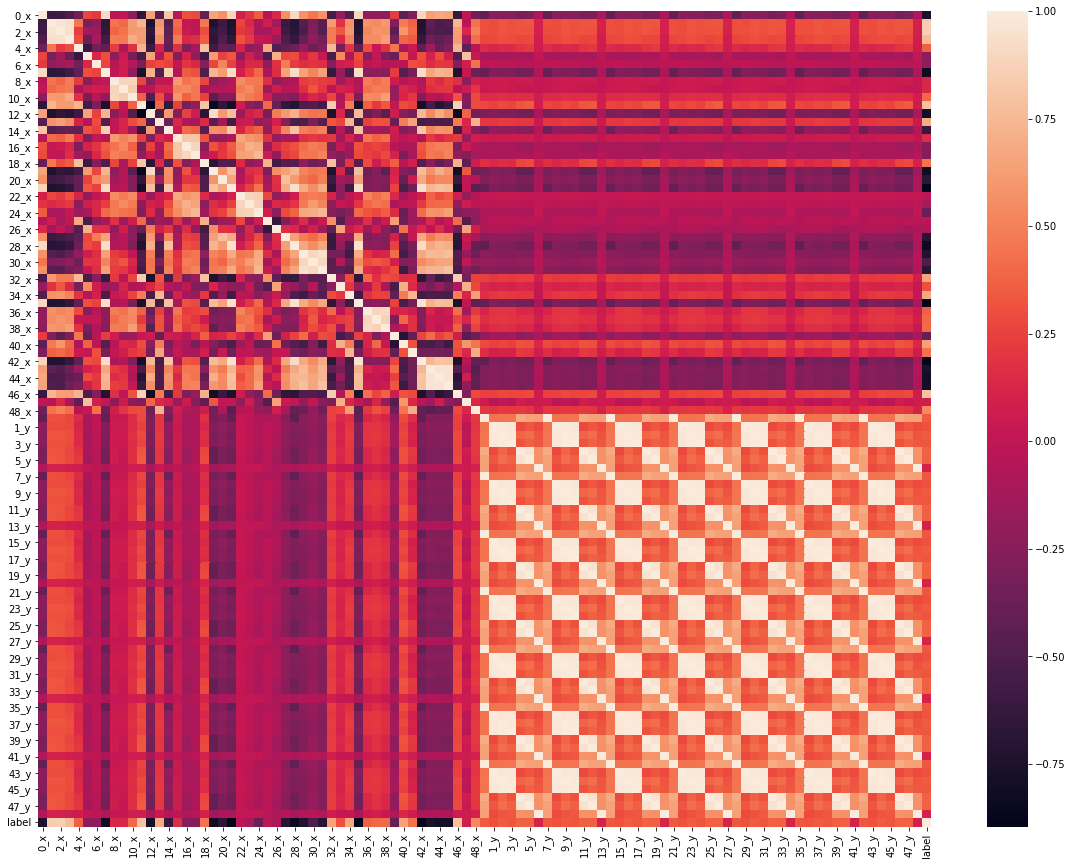

In [131]:
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df3.corr())